In [6]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [1]:
root_mse = 0.25*(80-20)**2 + 0.75*(0-20)**2
fever_mse = 0.25*(80-40)**2 + 0.25*(0-40)**2
fever_and_cough_mse = 0
print("Path fever gain % for tree A =", (root_mse-fever_mse)/root_mse)
print("Path cough gain % for tree A =", (fever_mse-fever_and_cough_mse)/root_mse)

Path fever gain % for tree A = 0.3333333333333333
Path cough gain % for tree A = 0.6666666666666666


In [2]:
root_mse = 0.25*(90-25)**2 + 0.25*(10-25)**2 + 0.5*(0-25)**2
cough_mse = 0.25*(90-50)**2 + 0.25*(10-50)**2
fever_and_cough_mse = 0
print("Path cough gain % for tree B =", (root_mse-cough_mse)/root_mse)
print("Path fever gain % for tree B =", (fever_mse-fever_and_cough_mse)/root_mse)

Path cough gain % for tree B = 0.43859649122807015
Path fever gain % for tree B = 0.5614035087719298


In [3]:
import math
def shapley_weight(N, S):
    return math.factorial(S)*math.factorial(N-S-1)/math.factorial(N)

# 11 => cough,fever
root_mse = 0.25*(80-20)**2 + 0.75*(0-20)**2
s00 = 0
s01 = root_mse - (0.25*(80-40)**2 + 0.25*(0-40)**2)
s10 = root_mse - (0.25*(0-0)**2 + 0.25*(0-0)**2 + 0.25*(0-40)**2 + 0.25*(80-40)**2)
s11 = root_mse - 0

print("SHAP cough gain % for tree A =", (shapley_weight(2,0)*(s10-s00) + shapley_weight(2,1)*(s11-s01))/root_mse)
print("SHAP fever gain % for tree A =", (shapley_weight(2,0)*(s01-s00) + shapley_weight(2,1)*(s11-s10))/root_mse)

SHAP cough gain % for tree A = 0.5
SHAP fever gain % for tree A = 0.5


In [4]:
# 11 => fever,cough
root_mse = 0.25*(90-25)**2 + 0.25*(10-25)**2 + 0.5*(0-25)**2
s00 = 0
s01 = root_mse - (0.25*(90-50)**2 + 0.25*(10-50)**2)
s10 = root_mse - (0.25*(0-5)**2 + 0.25*(10-5)**2 + 0.25*(0-45)**2 + 0.25*(90-45)**2)
s11 = root_mse - 0

print("SHAP fever gain % for tree B =", (shapley_weight(2,0)*(s10-s00) + shapley_weight(2,1)*(s11-s01))/root_mse)
print("SHAP cough gain % for tree B =", (shapley_weight(2,0)*(s01-s00) + shapley_weight(2,1)*(s11-s10))/root_mse)

SHAP fever gain % for tree B = 0.42105263157894735
SHAP cough gain % for tree B = 0.5789473684210527


## User experiment results

In [66]:
user_results = [{"cough_credit": 30, "fever_credit": 30},
{"cough_credit": 20, "fever_credit": 40},
{"cough_credit": 30, "fever_credit": 30},
{"cough_credit": 30, "fever_credit": 30},
{"cough_credit": 45, "fever_credit": 15},
{"cough_credit": 20, "fever_credit": 40},
{"cough_credit": 60, "fever_credit": 20},
{"cough_credit": 80, "fever_credit": 20},
{"cough_credit": 40, "fever_credit": 40},
{"cough_credit": 30, "fever_credit": 30},
{"cough_credit": 20, "fever_credit": 40},
{"cough_credit": 20, "fever_credit": 40},
{"cough_credit": 10, "fever_credit": 50},
{"cough_credit": 80, "fever_credit": 0},
{"cough_credit": 40, "fever_credit": 40},
{"cough_credit": 40, "fever_credit": 20},
{"cough_credit": 35, "fever_credit": 25},
{"cough_credit": 30, "fever_credit": 30},
{"cough_credit": 20, "fever_credit": 40},
{"cough_credit": 30, "fever_credit": 30},
{"cough_credit": 30, "fever_credit": 30},
{"cough_credit": 30, "fever_credit": 30},
{"cough_credit": 40, "fever_credit": 20},
{"cough_credit": 20, "fever_credit": 40},
{"cough_credit": 20, "fever_credit": 40},
{"cough_credit": 20, "fever_credit": 40},
{"cough_credit": 30, "fever_credit": 30},
{"cough_credit": 40, "fever_credit": 20},
{"cough_credit": 30, "fever_credit": 30},
{"cough_credit": 30, "fever_credit": 30},
{"cough_credit": 35, "fever_credit": 25},
{"cough_credit": 40, "fever_credit": 20},
{"cough_credit": 60, "fever_credit": 20},
{"cough_credit": 30, "fever_credit": 30}]

vals = [str(r["fever_credit"])+"_"+str(r["cough_credit"]) for r in user_results]

from collections import Counter
c = Counter( vals )

counts = list(c.items())
counts.sort(key=lambda x: -x[1])

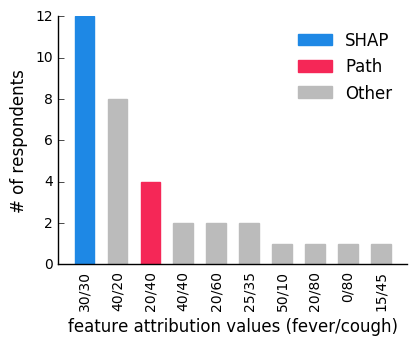

In [70]:
fig, ax = plt.subplots(figsize=(4.5,3.2))

bar_list = plt.bar(np.array(range(len(counts)))*5+2.5, [c[1] for c in counts], width=3)
[x.set_color('#bbbbbb') for x in bar_list]
bar_list[0].set_color('#1E88E5')
bar_list[2].set_color('#F52757')

# just stuff for
# leg1 = plt.bar(np.array([0]), [1])
# [x.set_color('#1E88E5') for x in leg1]
# leg2 = plt.bar(np.array([0]), [1])
# [x.set_color('#F52757') for x in leg2]
# leg3 = plt.bar(np.array([0]), [1])
# [x.set_color('#bbbbbb') for x in leg3]

import matplotlib.patches as mpatches

shap_patch = mpatches.Patch(color='#1E88E5', label='SHAP')
path_patch = mpatches.Patch(color='#F52757', label='Path')
other_patch = mpatches.Patch(color='#bbbbbb', label='Other')
plt.legend(handles=[blue_patch,path_patch,other_patch], frameon=False)


plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='on',      # ticks along the bottom edge are off
    right='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
plt.xticks(np.array(range(len(counts)))*5+4, [c[0].replace("_", "/") for c in counts], fontsize=10, rotation='vertical')
#plt.legend(["SHAP", "Path"], frameon=False, loc="upper center")
plt.ylabel("# of respondents", fontsize=12)
plt.xlabel("feature attribution values (fever/cough)", fontsize=12)
plt.xlim(0,53)
plt.savefig("tree_max.pdf")

In [28]:
"30_30".replace("_", "/")

'30/30'

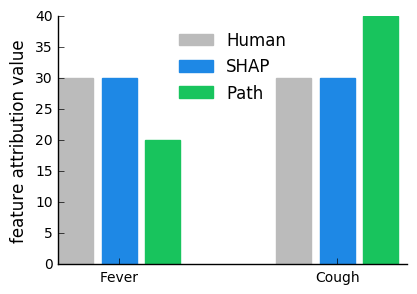

In [11]:
fig, ax = plt.subplots(figsize=(4.5,3.2))

bar_list = plt.bar(np.array([0,1])*5+1, [30, 30])
[x.set_color('#bbbbbb') for x in bar_list]

bar_list = plt.bar(np.array([0,1])*5+2, [30, 30])
[x.set_color('#1E88E5') for x in bar_list]

bar_list = plt.bar(np.array([0,1])*5+3, [20, 40])
[x.set_color('#18C45D') for x in bar_list]

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='on',      # ticks along the bottom edge are off
    right='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
plt.xticks(np.array([0,1])*5+2.4, ["Fever", "Cough"], fontsize=10)
plt.legend(["Human", "SHAP", "Path"], frameon=False, loc="upper center")
plt.ylabel("feature attribution value", fontsize=12)

In [23]:
counts.sort(key=lambda x: -x[1])

In [22]:
counts

[('40_40', 1),
 ('20_60', 1),
 ('20_80', 1),
 ('15_45', 1),
 ('40_20', 2),
 ('30_30', 4)]

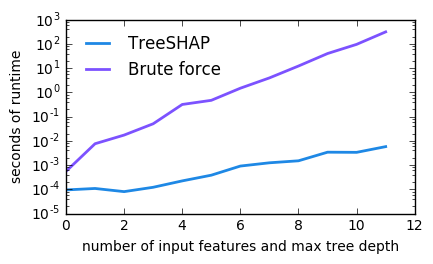

In [88]:
brute_force = [0.000547, 0.007596, 0.01731, 0.050687, 0.317647, 0.471027, 1.491240, 3.9685, 12.283, 40.28, 96.3355, 315.67518]
fast_method = [0.000094, 0.000108, 0.000080, 0.000121, 0.000222, 0.000382, 0.000910, 0.00124, 0.0015, 0.0034, 0.00335, 0.00577]
fig = plt.figure(figsize=(4.5,2.5))
plt.semilogy(fast_method, color='#1E88E5', linewidth=2)
plt.semilogy(brute_force, color='#7C52FF', linewidth=2)
plt.ylabel("seconds of runtime")
plt.xlabel("number of input features and max tree depth")
plt.legend(["TreeSHAP", "Brute force"], frameon=False, loc="upper left")
plt.savefig("runtime.pdf")